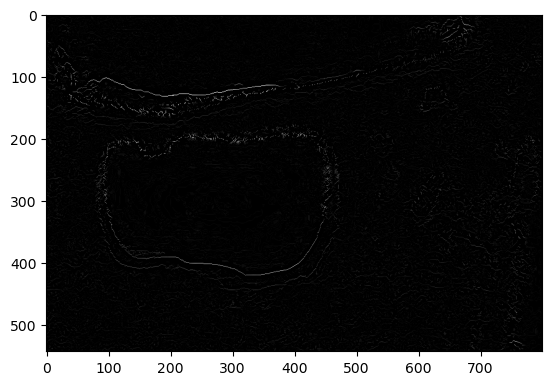

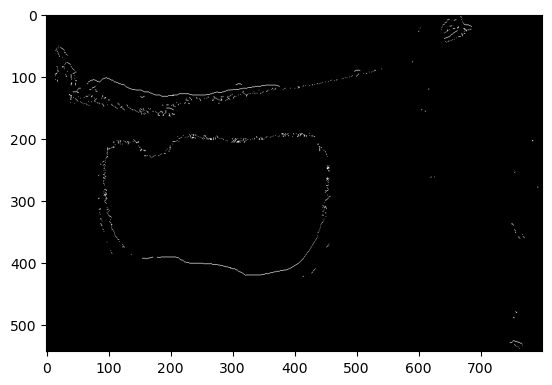

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00554594,
        0.        ],
       [0.        , 0.00392157, 0.00438445, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00499904, 0.00876889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
import numpy as np
from skimage.io import imread
from skimage.filters import sobel_h, sobel_v
import matplotlib.pyplot as plt

image = imread('ergebnis_aufgabe2.png')

#Gradienten berechnen
gx = sobel_h(image)
gy = sobel_v(image)

#Gradientenstärke berechnenen
G = np.sqrt(gx**2 + gy**2)

# Orienation bestimmen
theta = np.arctan2(gy, gx) * 180 / np.pi

#Größe nach Gradientenstärke
M, N = G.shape

thinned = np.zeros((M,N))

ori = [0, 45, -45, 90]
for i in range(1,M-1):
    for j in range(1,N-1):
        # Orientierung des Pixels bestimmen
        if -22.5 <= theta[i,j] < 22.5:
            o = 0
        elif 22.5 <= theta[i,j] < 67.5:
            o = 45
        elif -67.5 <= theta[i,j] < -22.5:
            o = -45
        else:
            o = 90
        #Nachbarn finden
        if o == 0:
            n1 = G[i,j-1]
            n2 = G[i,j+1]
        elif o == 45:
            n1 = G[i-1,j+1]
            n2 = G[i+1,j-1]
        elif o == -45:
            n1 = G[i-1,j-1]
            n2 = G[i+1,j+1]
        else:
            n1 = G[i-1,j]
            n2 = G[i+1,j]
        if G[i,j] >= n1 and G[i,j] >= n2:
            thinned[i,j] = G[i,j]
    
plt.imshow(thinned, cmap='gray')
plt.show()
#Threshold fürs Binarisieren
threshold = 0.05

# Binarisieren
binary = thinned > threshold
plt.imshow(binary, cmap='gray')
plt.show()